## Tutorial 6: multi class classification

### 0. Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('data/iris.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = df.drop('species', axis=1).values

targets = df['species'].unique()

In [3]:
target_dict = {n:i for i, n in enumerate(targets)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [4]:
y = df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [5]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

y_cat = to_categorical(y)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=0, stratify=y_cat)

print(X_train.shape)
print(y_train.shape)

(120, 4)
(120, 3)


### Model Construction

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(optimizer = 'Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(X_train[:5, :])
print(y_train[:5, :])
model.fit(X_train, y_train, epochs=100, verbose=2, batch_size=2)

[[6.7 3.  5.2 2.3]
 [5.8 2.7 5.1 1.9]
 [6.  3.  4.8 1.8]
 [7.3 2.9 6.3 1.8]
 [5.8 2.7 3.9 1.2]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
Epoch 1/100
120/120 - 0s - loss: 6.7991 - accuracy: 0.3333
Epoch 2/100
120/120 - 0s - loss: 5.7824 - accuracy: 0.3333
Epoch 3/100
120/120 - 0s - loss: 4.8669 - accuracy: 0.3333
Epoch 4/100
120/120 - 0s - loss: 4.1536 - accuracy: 0.3000
Epoch 5/100
120/120 - 0s - loss: 3.6371 - accuracy: 0.1333
Epoch 6/100
120/120 - 0s - loss: 3.2100 - accuracy: 0.1667
Epoch 7/100
120/120 - 0s - loss: 2.8035 - accuracy: 0.1917
Epoch 8/100
120/120 - 0s - loss: 2.3943 - accuracy: 0.2167
Epoch 9/100
120/120 - 0s - loss: 2.0096 - accuracy: 0.2333
Epoch 10/100
120/120 - 0s - loss: 1.6369 - accuracy: 0.2583
Epoch 11/100
120/120 - 0s - loss: 1.3449 - accuracy: 0.3083
Epoch 12/100
120/120 - 0s - loss: 1.1524 - accuracy: 0.3417
Epoch 13/100
120/120 - 0s - loss: 1.0507 - accuracy: 0.3833
Epoch 14/100
120/120 - 0s - loss: 1.0057 - accuracy: 0.4583
Epoch 15/100

In [8]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [9]:
y_test_class[:4]

array([2, 1, 2, 0], dtype=int64)

In [10]:
y_pred_class[:4]

array([2, 1, 2, 0], dtype=int64)

### 2. Analysis

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test_class, y_pred_class))

print(y_test_class)
print(y_pred_class)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

   micro avg       0.93      0.93      0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[2 1 2 0 2 1 0 2 2 1 0 1 1 0 1 0 0 1 1 2 2 0 0 0 2 1 1 0 2 2]
[2 1 2 0 2 1 0 2 2 1 0 1 2 0 1 0 0 1 1 2 2 0 0 0 2 2 1 0 2 2]


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test_class, y_pred_class)
print(targets)
pd.DataFrame(cm, index=targets, columns={'pred_'+c for c in targets})

['setosa' 'versicolor' 'virginica']


,pred_versicolor,pred_setosa,pred_virginica
setosa,10,0,0
versicolor,0,8,2
virginica,0,0,10


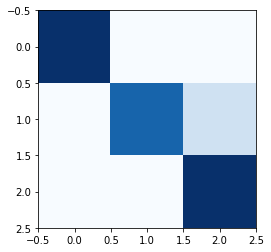

In [24]:
import matplotlib.pyplot as plt

plt.imshow(cm, cmap='Blues')

Text(0.5, 0.98, 'The Iris Dataset')

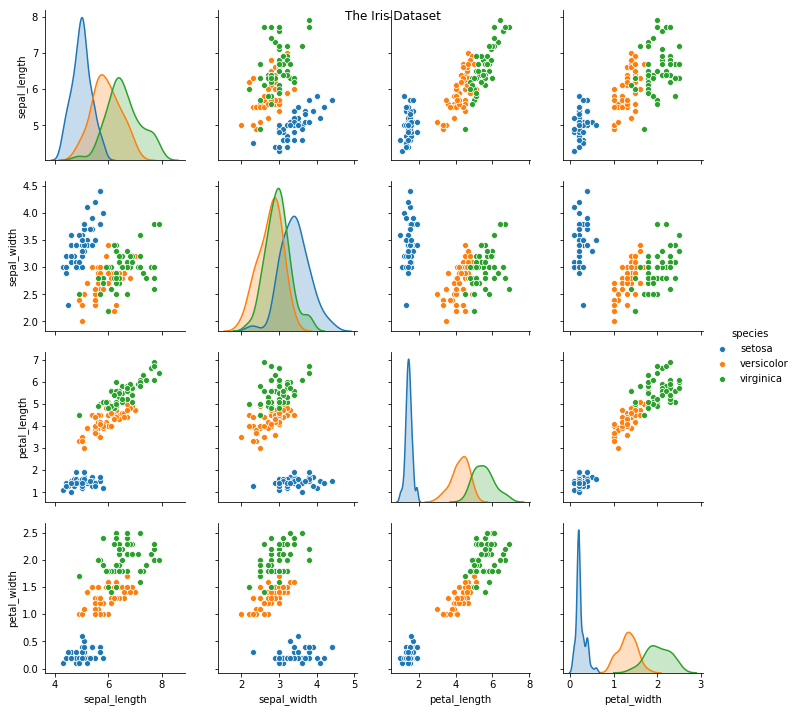

In [26]:
import seaborn as sns

g = sns.pairplot(df,  hue="species")
g.fig.suptitle('The Iris Dataset')